In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations. 

Целта на това изследване е да провери зависимостите в навика на клиентите за начин на плащане

Допускаме, че по-младите клиенти използват по-съвременния начин на плащане с карта.

Допускаме, че по-скорошните месеци се е вдигнал процента на използващите карта, спрамо използващите кеш

In [2]:
shopping = pd.read_csv("./data/customer_shopping_data.csv")
shopping_mall = pd.read_csv("./data/shopping_mall.csv")

In [3]:
shopping.head()

,invoice no,customer id,gender,age,category,quantity,price,payment method,invoice date,shopping mall id
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05/08/2022,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,2
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09/11/2021,3
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,4
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,1


In [4]:
shopping_mall.head()

,shopping mall id,shopping mall
0,1,Kanyon
1,2,Forum Istanbul
2,3,Metrocity
3,4,Metropol AVM
4,5,Istinye Park


In [5]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   invoice no        99457 non-null  object 
 1   customer id       99457 non-null  object 
 2   gender            99457 non-null  object 
 3   age               99457 non-null  int64  
 4   category          99457 non-null  object 
 5   quantity          99457 non-null  int64  
 6   price             99457 non-null  float64
 7   payment method    99457 non-null  object 
 8   invoice date      99457 non-null  object 
 9   shopping mall id  99457 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 7.6+ MB


In [6]:
# null_rates = shopping.isnull().mean()
# null_columns = null_rates[null_rates > 0]
# for column, null_rate in null_columns.items():
#     print(f"{column} null rate: {null_rate:.2f}")

In [7]:
shopping.columns = shopping.columns.str.replace(" ", "_")
shopping_mall.columns = shopping_mall.columns.str.replace(" ", "_")
shopping

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall_id
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05/08/2022,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,2
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09/11/2021,3
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,4
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,1
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,1
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,2
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,3
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,5


In [8]:
shopping.drop(["invoice_no", "customer_id", "quantity"], axis=1, inplace=True)
shopping

,gender,age,category,price,payment_method,invoice_date,shopping_mall_id
0,Female,28,Clothing,1500.40,Credit Card,05/08/2022,1
1,Male,21,Shoes,1800.51,Debit Card,12/12/2021,2
2,Male,20,Clothing,300.08,Cash,09/11/2021,3
3,Female,66,Shoes,3000.85,Credit Card,16/05/2021,4
4,Female,53,Books,60.60,Cash,24/10/2021,1
...,...,...,...,...,...,...,...
99452,Female,45,Souvenir,58.65,Credit Card,21/09/2022,1
99453,Male,27,Food & Beverage,10.46,Cash,22/09/2021,2
99454,Male,63,Food & Beverage,10.46,Debit Card,28/03/2021,3
99455,Male,56,Technology,4200.00,Cash,16/03/2021,5


In [9]:
# pd.merge(shopping, shopping_mall, on ='shopping_mall_id', how ='inner')

In [10]:
shopping = pd.merge(shopping, shopping_mall, on="shopping_mall_id")
shopping

,gender,age,category,price,payment_method,invoice_date,shopping_mall_id,shopping_mall
0,Female,28,Clothing,1500.40,Credit Card,05/08/2022,1,Kanyon
1,Female,53,Books,60.60,Cash,24/10/2021,1,Kanyon
2,Female,60,Clothing,600.16,Credit Card,22/08/2021,1,Kanyon
3,Female,67,Clothing,600.16,Credit Card,03/06/2022,1,Kanyon
4,Male,44,Technology,5250.00,Cash,26/10/2021,1,Kanyon
...,...,...,...,...,...,...,...,...
99452,Female,33,Cosmetics,162.64,Debit Card,12/08/2021,10,Zorlu Center
99453,Female,67,Toys,143.36,Cash,03/10/2021,10,Zorlu Center
99454,Female,50,Books,30.30,Cash,27/08/2022,10,Zorlu Center
99455,Male,38,Food & Beverage,20.92,Cash,02/03/2023,10,Zorlu Center


In [11]:
shopping.drop(["shopping_mall_id"], axis=1, inplace=True)
shopping

,gender,age,category,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,1500.40,Credit Card,05/08/2022,Kanyon
1,Female,53,Books,60.60,Cash,24/10/2021,Kanyon
2,Female,60,Clothing,600.16,Credit Card,22/08/2021,Kanyon
3,Female,67,Clothing,600.16,Credit Card,03/06/2022,Kanyon
4,Male,44,Technology,5250.00,Cash,26/10/2021,Kanyon
...,...,...,...,...,...,...,...
99452,Female,33,Cosmetics,162.64,Debit Card,12/08/2021,Zorlu Center
99453,Female,67,Toys,143.36,Cash,03/10/2021,Zorlu Center
99454,Female,50,Books,30.30,Cash,27/08/2022,Zorlu Center
99455,Male,38,Food & Beverage,20.92,Cash,02/03/2023,Zorlu Center


In [12]:
age_groups = ["18-30", "31-43", "44-56", "57-69"]

# Дефиниране на age_groups преди pd.cut

age_groups_pd = pd.cut(
  shopping["age"],
  bins=[0, 30, 43, 56, np.inf],
  labels=age_groups,
)

shopping["age_group"] = age_groups_pd
shopping

,gender,age,category,price,payment_method,invoice_date,shopping_mall,age_group
0,Female,28,Clothing,1500.40,Credit Card,05/08/2022,Kanyon,18-30
1,Female,53,Books,60.60,Cash,24/10/2021,Kanyon,44-56
2,Female,60,Clothing,600.16,Credit Card,22/08/2021,Kanyon,57-69
3,Female,67,Clothing,600.16,Credit Card,03/06/2022,Kanyon,57-69
4,Male,44,Technology,5250.00,Cash,26/10/2021,Kanyon,44-56
...,...,...,...,...,...,...,...,...
99452,Female,33,Cosmetics,162.64,Debit Card,12/08/2021,Zorlu Center,31-43
99453,Female,67,Toys,143.36,Cash,03/10/2021,Zorlu Center,57-69
99454,Female,50,Books,30.30,Cash,27/08/2022,Zorlu Center,44-56
99455,Male,38,Food & Beverage,20.92,Cash,02/03/2023,Zorlu Center,31-43


In [13]:
age_group_ages = shopping.groupby('age_group')['age'].unique()

# Подредба на списъците с възрасти във всяка възрастова група
age_group_ages_sorted = age_group_ages.apply(sorted)

# Преобразуване на групирането в DataFrame
age_group_table = pd.DataFrame(age_group_ages_sorted).reset_index()

# Извеждане на таблицата
print(age_group_table)

  age_group                                                age
0     18-30  [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...
1     31-43  [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...
2     44-56  [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 5...
3     57-69  [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6...


In [14]:
# shopping.to_csv("shopping_new2.csv", index=False)

| Group  |    |    |    |    |    |    |    |    |    |    |    |    |    |
|--------|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 18-30  | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 |
|  31-43 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 |
|  44-56 | 44 | 45 | 46 | 47 | 48 | 49 | 50 | 51 | 52 | 53 | 54 | 55 | 56 |
|  57-69 | 57 | 58 | 59 | 60 | 61 | 62 | 63 | 64 | 65 | 66 | 67 | 68 | 69 |

In [15]:
max_age = shopping["age"].max()
min_age = shopping["age"].min()
max_age

69

In [16]:
unique_ages = shopping["age"].unique()
print("Брой на уникалните възрасти:", len(unique_ages))

Брой на уникалните възрасти: 52


In [17]:
shopping.describe()

,age,price
count,99457.000000,99457.000000
mean,43.427089,689.256321
std,14.990054,941.184567
min,18.000000,5.230000
25%,30.000000,45.450000
50%,43.000000,203.300000
75%,56.000000,1200.320000
max,69.000000,5250.000000


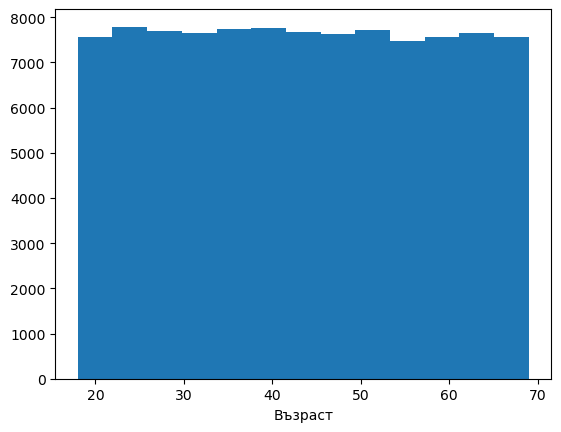

In [18]:
plt.hist(shopping["age"], bins=13)
plt.xlabel("Възраст")
# plt.ylabel("Честота")
plt.show()

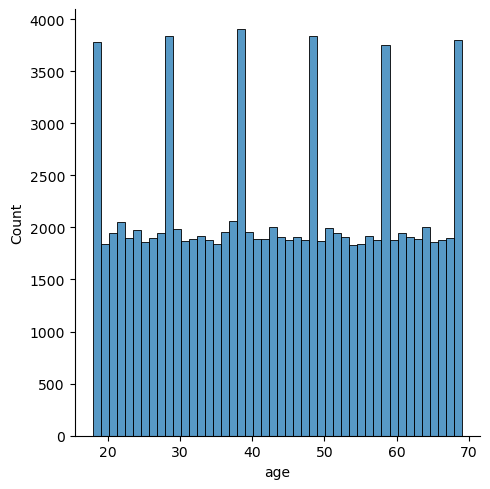

In [19]:
sns.displot(data=shopping, x="age")

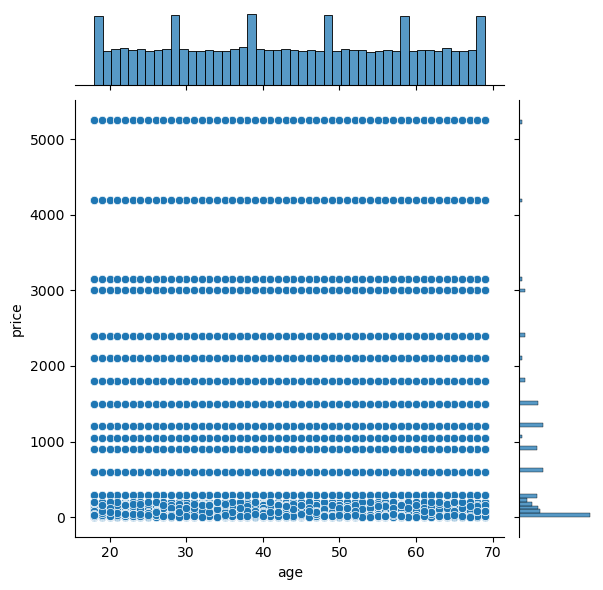

In [20]:
sns.jointplot(data=shopping, x="age", y="price")

In [21]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99457 entries, 0 to 99456
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          99457 non-null  object  
 1   age             99457 non-null  int64   
 2   category        99457 non-null  object  
 3   price           99457 non-null  float64 
 4   payment_method  99457 non-null  object  
 5   invoice_date    99457 non-null  object  
 6   shopping_mall   99457 non-null  object  
 7   age_group       99457 non-null  category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 8.2+ MB


In [22]:
# Липсващи данни
shopping.isnull().sum()

gender            0
age               0
category          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
age_group         0
dtype: int64

In [23]:
# % липсващи данни
(shopping.isnull().sum() / shopping.shape[0]) * 100

gender            0.0
age               0.0
category          0.0
price             0.0
payment_method    0.0
invoice_date      0.0
shopping_mall     0.0
age_group         0.0
dtype: float64

In [24]:
# shopping["invoice_date"] = pd.to_datetime(shopping["invoice_date"], format="%m/%d/%Y")
shopping['invoice_date'] = pd.to_datetime(shopping['invoice_date'], format='%d/%m/%Y')


# Проверка на типа
shopping["invoice_date"].dtype

dtype('<M8[ns]')

In [25]:
import datetime

# Създаване на нова колона "month_year"
shopping["month_year"] = shopping["invoice_date"].dt.strftime("%Y-%m")

# Пример
# shopping["month_year"] = shopping["invoice_date"].dt.strftime("%B-%Y")

# shopping.head(6)
shopping

,gender,age,category,price,payment_method,invoice_date,shopping_mall,age_group,month_year
0,Female,28,Clothing,1500.40,Credit Card,2022-08-05,Kanyon,18-30,2022-08
1,Female,53,Books,60.60,Cash,2021-10-24,Kanyon,44-56,2021-10
2,Female,60,Clothing,600.16,Credit Card,2021-08-22,Kanyon,57-69,2021-08
3,Female,67,Clothing,600.16,Credit Card,2022-06-03,Kanyon,57-69,2022-06
4,Male,44,Technology,5250.00,Cash,2021-10-26,Kanyon,44-56,2021-10
...,...,...,...,...,...,...,...,...,...
99452,Female,33,Cosmetics,162.64,Debit Card,2021-08-12,Zorlu Center,31-43,2021-08
99453,Female,67,Toys,143.36,Cash,2021-10-03,Zorlu Center,57-69,2021-10
99454,Female,50,Books,30.30,Cash,2022-08-27,Zorlu Center,44-56,2022-08
99455,Male,38,Food & Beverage,20.92,Cash,2023-03-02,Zorlu Center,31-43,2023-03


In [26]:
unique_payment_methods = shopping['payment_method'].unique()
print(unique_payment_methods)

['Credit Card' 'Cash' 'Debit Card']


In [27]:
shopping['payment_method'] = shopping['payment_method'].replace(['Credit Card', 'Debit Card'], 'Card')

print(shopping['payment_method'].unique())

['Card' 'Cash']


In [28]:
shopping

,gender,age,category,price,payment_method,invoice_date,shopping_mall,age_group,month_year
0,Female,28,Clothing,1500.40,Card,2022-08-05,Kanyon,18-30,2022-08
1,Female,53,Books,60.60,Cash,2021-10-24,Kanyon,44-56,2021-10
2,Female,60,Clothing,600.16,Card,2021-08-22,Kanyon,57-69,2021-08
3,Female,67,Clothing,600.16,Card,2022-06-03,Kanyon,57-69,2022-06
4,Male,44,Technology,5250.00,Cash,2021-10-26,Kanyon,44-56,2021-10
...,...,...,...,...,...,...,...,...,...
99452,Female,33,Cosmetics,162.64,Card,2021-08-12,Zorlu Center,31-43,2021-08
99453,Female,67,Toys,143.36,Cash,2021-10-03,Zorlu Center,57-69,2021-10
99454,Female,50,Books,30.30,Cash,2022-08-27,Zorlu Center,44-56,2022-08
99455,Male,38,Food & Beverage,20.92,Cash,2023-03-02,Zorlu Center,31-43,2023-03


In [29]:
shopping_month_grouped = shopping.groupby(['month_year', 'payment_method'])['price'].sum().unstack().reset_index()

shopping_month_grouped.head()

payment_method,month_year,Card,Cash
0,2021-01,1415876.38,1240546.40
1,2021-02,1322597.82,1036038.52
2,2021-03,1462455.73,1155978.41
3,2021-04,1419131.92,1139693.70
4,2021-05,1475074.45,1187295.48


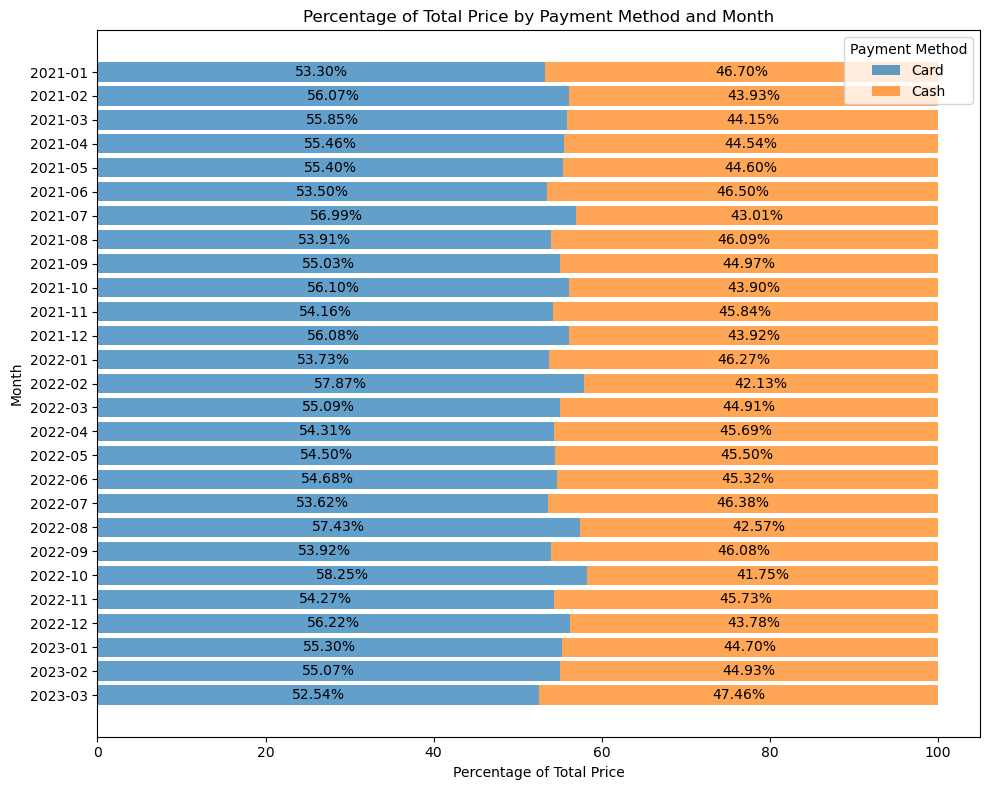

In [30]:
shopping_month_grouped.iloc[:, 1:] = shopping_month_grouped.iloc[:, 1:].div(shopping_month_grouped.iloc[:, 1:].sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
for i, column in enumerate(shopping_month_grouped.columns[1:]):
    if i == 0:
        plt.barh(shopping_month_grouped['month_year'], shopping_month_grouped[column], label=column, alpha=0.7)
    else:
        left = shopping_month_grouped.iloc[:, 1:i+1].sum(axis=1)
        plt.barh(shopping_month_grouped['month_year'], shopping_month_grouped[column], left=left, label=column, alpha=0.7)
for i, column in enumerate(shopping_month_grouped.columns[1:]):
    for j, value in enumerate(shopping_month_grouped[column]):
        plt.text(value / 2 + (shopping_month_grouped.iloc[:, 1:i+1].sum(axis=1))[j], j, f'{value:.2f}%', ha='center', va='center')

plt.title('Percentage of Total Price by Payment Method and Month')
plt.xlabel('Percentage of Total Price')
plt.ylabel('Month')
plt.legend(title='Payment Method')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [31]:
shopping_age = shopping.groupby(['age', 'payment_method'])['price'].sum().unstack().reset_index()

shopping_age.head()

payment_method,age,Card,Cash
0,18,646720.50,564743.12
1,19,718365.88,576790.59
2,20,679870.46,571732.87
3,21,713286.25,606487.86
4,22,802612.50,621633.75


In [32]:
shopping_age_grouped = shopping.groupby(['age_group', 'payment_method'])['price'].sum().unstack().reset_index()

shopping_age_grouped

payment_method,age_group,Card,Cash
0,18-30,9501044.48,7703109.31
1,31-43,9407207.91,7847740.05
2,44-56,9602514.66,7493534.32
3,57-69,9335567.88,7660647.30


In [33]:
# shopping_age_grouped = shopping.groupby(['age_group', 'payment_method'])['price'].sum().reset_index().pivot_table(index='age_group', columns='payment_method', values='price', fill_value=0)
# shopping_age_grouped

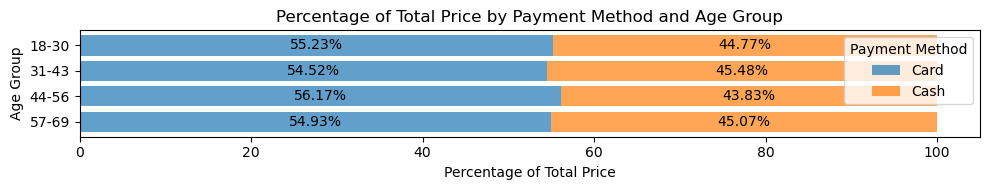

In [34]:
shopping_age_grouped.iloc[:, 1:] = shopping_age_grouped.iloc[:, 1:].div(shopping_age_grouped.iloc[:, 1:].sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 2))
for i, column in enumerate(shopping_age_grouped.columns[1:]):
    if i == 0:
        plt.barh(shopping_age_grouped['age_group'], shopping_age_grouped[column], label=column, alpha=0.7)
    else:
        left = shopping_age_grouped.iloc[:, 1:i+1].sum(axis=1)
        plt.barh(shopping_age_grouped['age_group'], shopping_age_grouped[column], left=left, label=column, alpha=0.7)
for i, column in enumerate(shopping_age_grouped.columns[1:]):
    for j, value in enumerate(shopping_age_grouped[column]):
        plt.text(value / 2 + shopping_age_grouped.iloc[:, 1:i+1].sum(axis=1).iloc[j], j, f'{value:.2f}%', ha='center', va='center')

plt.title('Percentage of Total Price by Payment Method and Age Group')
plt.xlabel('Percentage of Total Price')
plt.ylabel('Age Group')
plt.legend(title='Payment Method')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [35]:
shopping_mall_grouped = shopping.groupby(['shopping_mall', 'payment_method'])['price'].sum().unstack().reset_index()

shopping_mall_grouped

payment_method,shopping_mall,Card,Cash
0,Cevahir AVM,1914348.46,1519323.38
1,Emaar Square Mall,1844232.06,1546176.25
2,Forum Istanbul,1906309.54,1429764.28
3,Istinye Park,3705068.72,3012008.82
4,Kanyon,7505533.57,6205221.67
5,Mall of Istanbul,7609958.06,6241779.56
6,Metrocity,5697197.68,4552782.39
7,Metropol AVM,3834673.50,3103319.49
8,Viaport Outlet,1868547.78,1545471.68
9,Zorlu Center,1960465.56,1549183.46


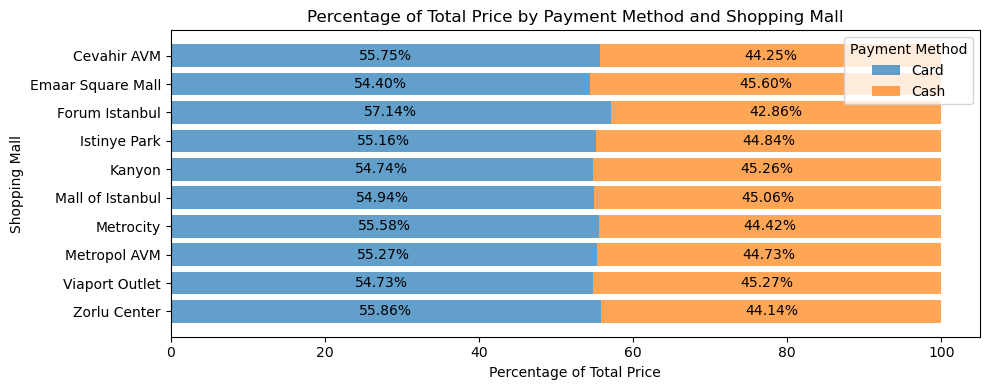

In [36]:
shopping_mall_grouped.iloc[:, 1:] = shopping_mall_grouped.iloc[:, 1:].div(shopping_mall_grouped.iloc[:, 1:].sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 4))
for i, column in enumerate(shopping_mall_grouped.columns[1:]):
    if i == 0:
        plt.barh(shopping_mall_grouped['shopping_mall'], shopping_mall_grouped[column], label=column, alpha=0.7)
    else:
        left = shopping_mall_grouped.iloc[:, 1:i+1].sum(axis=1)
        plt.barh(shopping_mall_grouped['shopping_mall'], shopping_mall_grouped[column], left=left, label=column, alpha=0.7)
for i, column in enumerate(shopping_mall_grouped.columns[1:]):
    for j, value in enumerate(shopping_mall_grouped[column]):
        plt.text(value / 2 + (shopping_mall_grouped.iloc[:, 1:i+1].sum(axis=1))[j], j, f'{value:.2f}%', ha='center', va='center')

plt.title('Percentage of Total Price by Payment Method and Shopping Mall')
plt.xlabel('Percentage of Total Price')
plt.ylabel('Shopping Mall')
plt.legend(title='Payment Method')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [37]:
# def plot_percentage_by_group(df, group_column, figsize=(10, 4)):
#     grouped_data = df.groupby([group_column, 'payment_method'])['price'].sum().unstack().reset_index()
#     grouped_data.iloc[:, 1:] = grouped_data.iloc[:, 1:].div(grouped_data.iloc[:, 1:].sum(axis=1), axis=0) * 100

#     plt.figure(figsize=figsize)
#     for i, column in enumerate(grouped_data.columns[1:]):
#         if i == 0:
#             plt.barh(grouped_data[group_column], grouped_data[column], label=column, alpha=0.7)
#         else:
#             left = grouped_data.iloc[:, 1:i+1].sum(axis=1)
#             plt.barh(grouped_data[group_column], grouped_data[column], left=left, label=column, alpha=0.7)
#     for i, column in enumerate(grouped_data.columns[1:]):
#         for j, value in enumerate(grouped_data[column]):
#             plt.text(value / 2 + (grouped_data.iloc[:, 1:i+1].sum(axis=1))[j], j, f'{value:.2f}%', ha='center', va='center')

#     plt.title('Percentage of Total Price by Payment Method and ' + group_column.replace('_', ' ').title())
#     plt.xlabel('Percentage of Total Price')
#     plt.ylabel(group_column.replace('_', ' ').title())
#     plt.legend(title='Payment Method')
#     plt.gca().invert_yaxis()

#     plt.tight_layout()
#     plt.show()

# plot_percentage_by_group(shopping, 'shopping_mall', figsize=(10, 4))

In [38]:
def group_and_sum(df, group_column):
    grouped_data = df.groupby([group_column, 'payment_method'])['price'].sum().unstack().reset_index()
    return grouped_data

grouped_data = group_and_sum(shopping, 'shopping_mall')

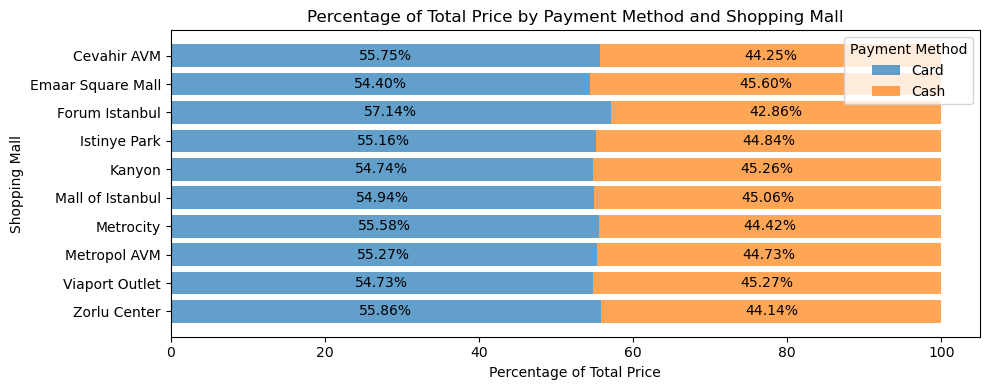

In [39]:
def plot_percentage_by_group(df, group_column, figsize=(10, 4)):
#     grouped_data = group_and_sum(df, group_column)
    grouped_data.iloc[:, 1:] = grouped_data.iloc[:, 1:].div(grouped_data.iloc[:, 1:].sum(axis=1), axis=0) * 100

    plt.figure(figsize=figsize)
    for i, column in enumerate(grouped_data.columns[1:]):
        if i == 0:
            plt.barh(grouped_data[group_column], grouped_data[column], label=column, alpha=0.7)
        else:
            left = grouped_data.iloc[:, 1:i+1].sum(axis=1)
            plt.barh(grouped_data[group_column], grouped_data[column], left=left, label=column, alpha=0.7)
    for i, column in enumerate(grouped_data.columns[1:]):
        for j, value in enumerate(grouped_data[column]):
            plt.text(value / 2 + (grouped_data.iloc[:, 1:i+1].sum(axis=1))[j], j, f'{value:.2f}%', ha='center', va='center')

    plt.title('Percentage of Total Price by Payment Method and ' + group_column.replace('_', ' ').title())
    plt.xlabel('Percentage of Total Price')
    plt.ylabel(group_column.replace('_', ' ').title())
    plt.legend(title='Payment Method')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_percentage_by_group(shopping, 'shopping_mall', figsize=(10, 4))